#### **Problem Statement:**

**Project Title:** Customer Segmentation and Purchase Behavior Prediction for Retail Businesses

**Problem Statement:** Purchase Behavior Prediction at Segment-Level: Using Demographic and Transactional Data to Identify Trends in Retail Customer Purchases Across Different Categories.

**Objective:** Develop a predictive model that forecasts purchase behavior not for individual customers, but for similar customer segments (e.g., age group, gender, location).

**Importance:** This approach allows retailers to predict overall category-level demands and tailor marketing or stocking strategies to different customer demographics, even without repeated customer interactions.

#### **Ask Questions:**

#### **Adnan Shahid Sadar(50592332)**

**Question 1:** How do age and gender affect customer preferences for different product categories?

Hypotheses: Younger customers may prefer fashion items, while older customers may lean toward household products. Gender might also influence the likelihood of purchasing specific categories.

Significance: This question helps identify demographic factors driving purchasing decisions. Retailers can use these insights for targeted marketing and product stocking strategies.

**Question 2:** Do customers in different locations (shopping malls) show distinct purchasing behaviors?

Hypotheses: Customers from malls located in urban areas may buy higher-priced products compared to those in suburban or rural areas.

Significance: Retailers could optimize inventory management based on regional preferences, leading to better resource allocation and increased sales.


#### **Mohammed Abdul Aftab Muddassir(50604245)**

**Question 1:** Which product categories are generating the highest sales, indicating a need for potential adjustments in stocking strategies?
•	Understanding which product categories are generating the highest sales allows businesses to pinpoint their top-performing items. This information is crucial for assessing the success of current offerings and for planning future product launches or promotions.
•	By knowing which categories are selling well, businesses can adjust their stocking strategies to ensure that high-demand items are adequately stocked. This helps prevent stockouts, reducing lost sales opportunities, and overstock situations that lead to increased holding costs.
•	Sales data can guide product development efforts. If certain categories are performing well, businesses can explore expanding their offerings within those categories, introducing new variations or complementary products to meet consumer demand.

**Question 2:**  How do the revenue trends across different quarters in 2021 and 2022 compare, and what are the underlying factors influencing variations in quarterly performance?
•	Business Insights: Understanding the revenue performance across different quarters provides valuable insights into seasonal trends and purchasing behaviors. Businesses can use this information to identify peak periods for sales and plan inventory and marketing strategies accordingly. 
•	Performance Evaluation: Analyzing quarterly revenue differences can help evaluate the impact of marketing campaigns, product launches, and economic conditions on sales. If one year outperforms another in a specific quarter, it may indicate the effectiveness of certain strategies or changes in consumer preferences. 
•	Resource Allocation: By identifying quarters with higher revenue, businesses can make informed decisions about resource allocation, staffing, and promotional efforts to maximize sales during peak periods. 
•	Future Forecasting: Analyzing historical revenue trends across quarters helps in predicting future performance. If certain quarters consistently generate higher revenue, businesses can develop forecasts and budgets based on past performance. 
•	Investor Confidence: For stakeholders and investors, understanding revenue trends and their significance can instill confidence in the company’s growth prospects. A positive trend in revenue performance may attract more investment or encourage expansion plans.


#### **Data Cleaning/Data Retrieval:**

In [118]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
# Load the dataset
df = pd.read_csv('customer_shopping_data.csv')

In [120]:
df.describe()

,age,quantity,price
count,99453.000000,99457.000000,99457.000000
mean,43.432134,3.003429,689.256321
std,15.008140,1.413025,941.184567
min,2.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,155.000000,5.000000,5250.000000


In [121]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Location
0,I138884,C241288,Female,28.0,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,Sisli
1,I317333,C111565,NaN,21.0,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,Bayrampasa
2,I127801,C266599,Male,20.0,Clothing,1,300.08,Cash,9/11/2021,Metrocity,Besiktas
3,I173702,C988172,Female,66.0,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,Atasehir
4,I337046,C189076,Female,53.0,Books,4,60.60,Cash,24/10/2021,Kanyon,Sisli


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99446 non-null  object 
 3   age             99453 non-null  float64
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99454 non-null  object 
 10  Location        99454 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.3+ MB


**Printing the shape:**

In [123]:
df.shape

(99457, 11)

**Check for duplicated values:**

In [124]:
df.duplicated().sum()

0

**Check for null values:**

In [125]:
print(df.isnull().sum())

invoice_no         0
customer_id        0
gender            11
age                4
category           0
quantity           0
price              0
payment_method     0
invoice_date       0
shopping_mall      3
Location           3
dtype: int64


We can see that our dataset has columns with null values

Now, we have the option to either drop records having null values or impute them with mean, median, mode

In [126]:
print(df.describe())

                age      quantity         price
count  99453.000000  99457.000000  99457.000000
mean      43.432134      3.003429    689.256321
std       15.008140      1.413025    941.184567
min        2.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max      155.000000      5.000000   5250.000000


#### **Handling Missing Entries**

In [127]:
df = df.dropna(subset=['gender'])

median_age = df['age'].median()
df["age"]=df['age'].fillna(median_age)

df = df.dropna(subset=['shopping_mall'])

print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
Location          0
dtype: int64


Age: We have decided to impute this data with mean as the age data is typically not heavily skewed, so the mean provides a sensible replacement for missing values.

Gender: We have decided to drop missing records in this column because the number of missing records are less compared to the total number of records.

Store Location: Dropping missing records seemed like a better option as the missing records were less, and imputing doesn't really improve the quality of the dataset

#### **Handling Mismatched string formats**

In [128]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of type string
        all_title_case = df[column].str.istitle().all()
        
        if all_title_case:
            print(f"All strings in column '{column}' are in title case.")
        else:
            print(f"Not all strings in column '{column}' are in title case.")

All strings in column 'invoice_no' are in title case.
All strings in column 'customer_id' are in title case.
Not all strings in column 'gender' are in title case.
Not all strings in column 'category' are in title case.
All strings in column 'payment_method' are in title case.
Not all strings in column 'invoice_date' are in title case.
Not all strings in column 'shopping_mall' are in title case.
All strings in column 'Location' are in title case.


4 columns in the dataset have mismatched string formats

We will be ignoring the 'invoice_date' column and handling the mismatched string formats for other columns

In [129]:
df["gender"] = df["gender"].str.title()
df["category"] = df["category"].str.title()
df["shopping_mall"] = df["shopping_mall"].str.title()

In [130]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of type string
        all_title_case = df[column].str.istitle().all()
        
        if all_title_case:
            print(f"All strings in column '{column}' are in title case.")
        else:
            print(f"Not all strings in column '{column}' are in title case.")

All strings in column 'invoice_no' are in title case.
All strings in column 'customer_id' are in title case.
All strings in column 'gender' are in title case.
All strings in column 'category' are in title case.
All strings in column 'payment_method' are in title case.
Not all strings in column 'invoice_date' are in title case.
All strings in column 'shopping_mall' are in title case.
All strings in column 'Location' are in title case.


All mismatched strings in the columns have been handled now

#### **Handling Outliers**

In [131]:
print(df.describe())

                age      quantity         price
count  99443.000000  99443.000000  99443.000000
mean      43.432197      3.003439    689.290403
std       15.007765      1.413021    941.188540
min        2.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max      155.000000      5.000000   5250.000000


As we can see, 1 column: Age consists of outliers

In [132]:
# Handle outliers using IQR method and imputing them with median

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

df.loc[(df["age"] < lower_bound) | (df["age"] > upper_bound), "age"] = df["age"].median()

print(df.describe())

                age      quantity         price
count  99443.000000  99443.000000  99443.000000
mean      43.427411      3.003439    689.290403
std       14.989238      1.413021    941.188540
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


For handling outliers in the 'Age' column, we have reduced the IQR multiplier to raise the lower bound.

This has been done because the lower bound was being calculated as a negative number when using the multiplying factor of 1.5.

#### **Exploratory Data Analysis:**

#### **Adnan Shahid Sadar (50592332)**

**Hypothesis 1:**
Customers' age and gender influence their preferences for product categories.

**EDA Step:** Group the data by age and gender, and compute the counts or proportions of purchases in different category groups.

**Outcome:** This can help identify the most common product categories for each gender and age range.

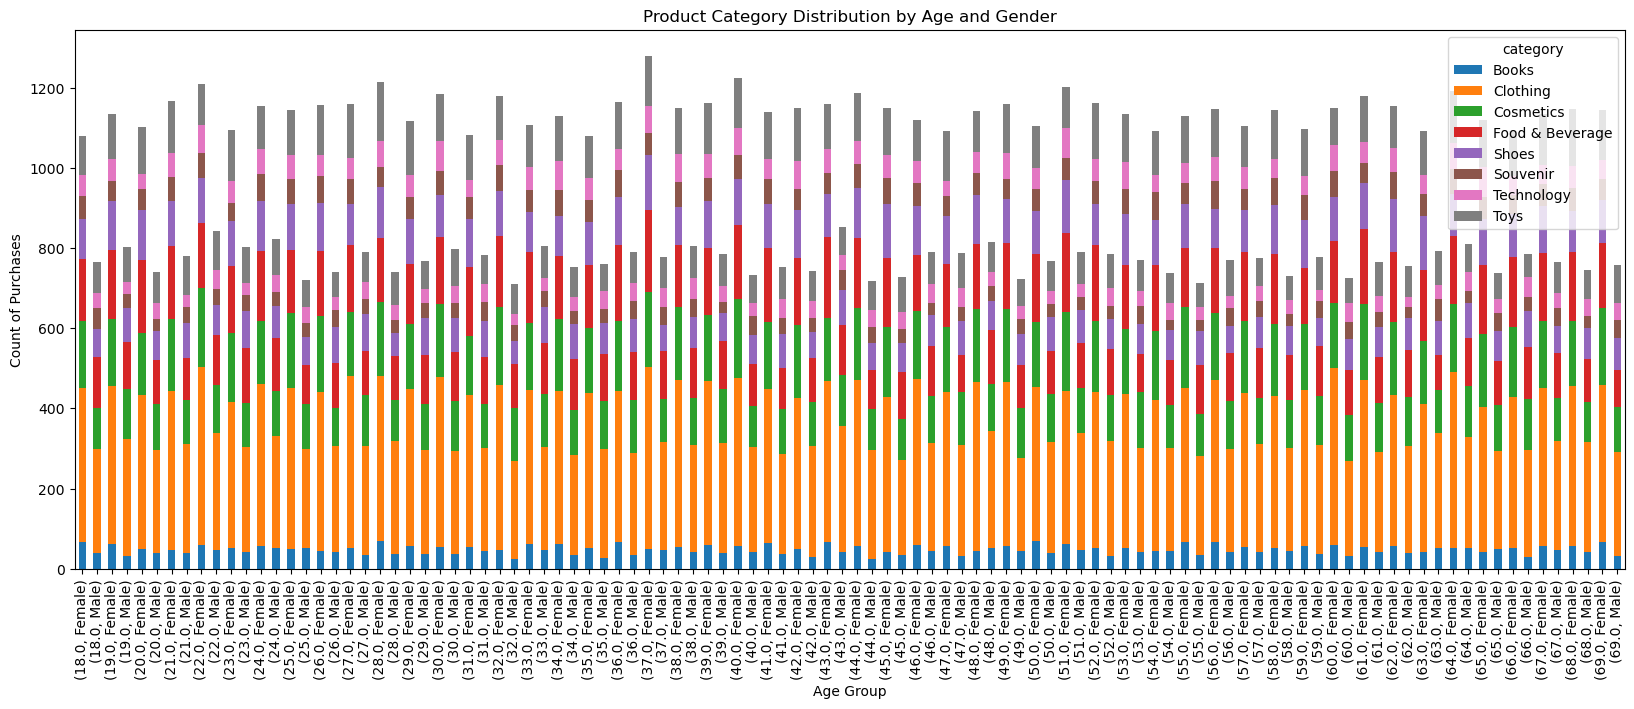

In [133]:
category_by_age_gender = df.groupby(['age', 'gender', 'category']).size().unstack().fillna(0)
category_by_age_gender.plot(kind='bar', stacked=True, figsize=(20, 7))
plt.title('Product Category Distribution by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count of Purchases')
plt.show()

Chi-Square Test for Categorical Features:

**EDA Step:** Perform a statistical test to see if there is a significant relationship between age/gender and product category.

**Outcome:** Understanding if there is a statistically significant dependence will help decide if these columns are important features for the model.

**Learnings & Feature Engineering:**

If age and gender significantly impact category preferences, we can keep them for modeling. Otherwise, we may consider dropping or reducing these features

In [134]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['category'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, P-value: {p_value}")


Chi-Square: 7.652540250750684, P-value: 0.36422683408825485


**Hypothesis 2:**
Customers from different locations exhibit distinct purchasing behaviors.

**EDA Step:** Group data by Location and category to observe purchase distributions in different locations.

**Outcome:** Detect which locations drive purchases for certain product categories.

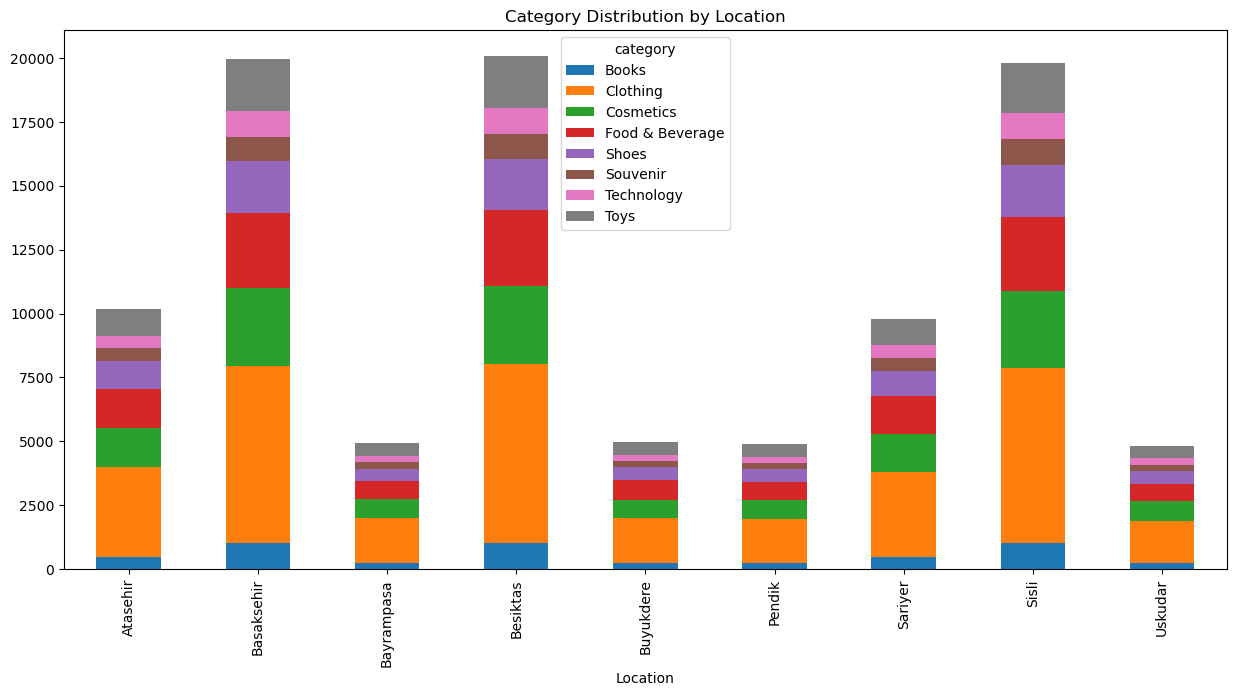

In [137]:
location_by_category = df.groupby(['Location', 'category']).size().unstack().fillna(0)
location_by_category.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Category Distribution by Location')
plt.show()

Perform an ANOVA (Analysis of Variance) to check if there’s any statistical difference in the mean quantity purchased across locations.

**Learnings & Feature Engineering:**

If the location has a significant effect on the purchase behavior, keep the Location feature for prediction. Otherwise, consider dropping or simplifying it.

In [136]:
from scipy.stats import f_oneway
mall_groups = [df[df['Location'] == mall]['quantity'] for mall in df['Location'].unique()]
f_stat, p_value = f_oneway(*mall_groups)

print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


ANOVA F-statistic: 0.413762863674586, P-value: 0.9134145050080709
